# Volume 3: Metropolis. Solutions.

In [5]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

## Problem 1

Write a function that accepts an integer $n$ and returns a random spin configuration for an $n \times n$ lattice (as an $n \times n$ NumPy array of $1$s and $-1$s).
Test your function with $n = 100$, plotting the spin configuration via `plt.imshow()`.

In [2]:
def random_lattice(n):
    """Construct a random spin configuration for an nxn lattice."""
    return np.random.randint(2,size=(n,n))*2 - 1

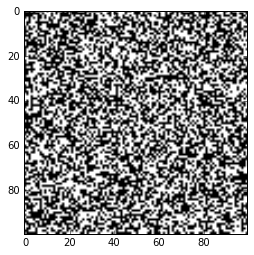

In [6]:
test = random_lattice(100)
plt.imshow(test, cmap='gray')
plt.show()

## Problem 2

Write a function that accepts a spin configuration $\sigma$ for a lattice as a NumPy array.
Compute the energy $H(\sigma)$ of the spin configuration.
Be careful to not double count site pair interactions!

In [49]:
def lattice_energy(L):
    """Computer the energy of the spin configuration corresponding to the
    lattice L.
    """
    '''
    energy = 0
    for row in L:
        energy += np.dot(row, np.roll(row, -1))
    for col in L.T:
        energy += np.dot(col, np.roll(col, -1))
    return -1*energy
    '''
    return np.sum(-L*(np.roll(L,1,axis=1) + np.roll(L,1,axis=0)))

## Problem 3

Write a function that accepts an integer $n$ and chooses a pair of indices $(i,j)$ where $0 \le i,j \le n-1$.
Each possible pair should have an equal probability $\frac{1}{n^2}$ of being chosen.

In [17]:
def flip_location(n):
    """Choose a random pair of indices 0 <= i,j <= n-1."""
    i,j = np.random.randint(n, size=2)
    return i,j

## Problem 4

Write a function that accepts a spin configuration $\sigma$, its energy $H(\sigma)$, and integer indices $i$ and $j$.
Compute the energy of the new spin configuration $\sigma^*$, which is $\sigma$ but with the spin flipped at the $(i,j)$th entry of the corresponding lattice.
Do not explicitly construct the new lattice for $\sigma^*$.

In [8]:
def updated_energy(L, L_energy, i, j):
    """Compute the energy of the spin configuration that results
    when the (i,j)th spin of L is flipped.
    """
    n = L.shape[0]
    return L_energy + 2*L[i,j]*(L[i-1,j] + L[i,j-1] + 
                                L[(i+1)%n,j] + L[i,(j+1)%n])

## Problem 5

Write a function that accepts a float $\beta$ and spin configuration energies $H(\sigma)$ and $H(\sigma^*)$.
Calculate whether or not the new spin configuration $\sigma^*$ should be accepted (return `True` or `False`).

In [29]:
def accept(beta, energy_old, energy_new):
    """Accept or reject the new spin configuration."""
    # A(s*, s) = 1 if H(s*) < H(s) or np.exp(beta*(H(s) - H(s*))) else
    A = np.min([1, np.exp(beta*(energy_old - energy_new))])
    if np.random.random() > A:
        return False
    else:
        return True

## Problem 6

Write a function that accepts a float $\beta>0$ and integers $n$, `n_samples`, and `burn_in`.
Initialize an $n\times n$ lattice for a spin configuration $\sigma$ using `random_lattice()`.
Use the Metropolis algorithm to (potentially) update the lattice `burn_in` times.
1. Use `flip_location()` to choose a site for possibly flipping the spin, thus defining a potential new configuration $\sigma^*$.
2. Use `updated_energy()` to calculate the energy $H(\sigma^*)$ of the proposed configuration.
3. Use `accept()` to accept or reject the proposed configuration. If it is accepted, set $\sigma = \sigma^*$ by flipping the spin at the indicated site.
4. Track $-\beta H(\sigma)$ at each iteration (independent of acceptance).

After the burn-in period, continue the iteration `n_samples` times, also recording every $100$th sample (to prevent memory failure).
Return the samples, the sequence of weighted energies $-\beta H(\sigma)$, and the acceptance rate.

Test your sampler on a $100 \times 100$ grid with $200000$ total iterations, with `n_samples` large enough so that you will keep $50$ samples, for $\beta = 0.2, 0.4, 1$.
Plot the proportional log probabilities, as well as a late sample from each test.


In [47]:
def ising_metropolis(beta, n=100, n_samples=5000, burn_in=195000):
    """Use the Metropolis algorithm to choose new spin configurations.

    Parameters:
        beta (float > 0): Constant inversely proportional to the temperature.
        N (int > 0): The size of the lattice.
        n_samples (int): The number of samples to generate.
        burnin (int): The number of iterations to burn before sampling.

    Returns:
        ((n_samples//100, n,n) ndarray): The sampled spin configurations.
        (n_samples) ndarray: The weighted energies of each configuration.
        (float): The proportion of proposed samples that were accepted.
    """
    sigma0 = random_lattice(n)
    sigma = sigma0.copy()
    Hold = lattice_energy(sigma0)
    history = []
    samples = []
    accepted = []
    for k in range(burn_in + n_samples):
        i,j = flip_location(n)
        Hnew = updated_energy(sigma, Hold, i, j)
        history.append(-beta*Hold)
        if accept(beta, Hold, Hnew):
            sigma[i,j] = sigma[i,j]*-1
            accepted.append(1)
        else:
            accepted.append(0)
        Hold = Hnew
        if k >= burn_in:
            #history.append(-beta*Hold)
            if (k - burn_in)%100 == 0:
                samples.append(sigma)
    
    return np.array(samples), np.array(history), np.array(accepted).mean()

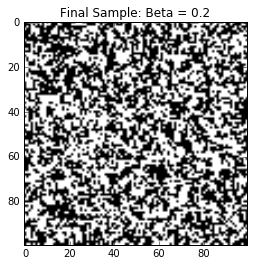

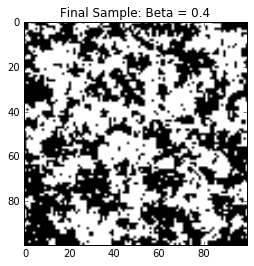

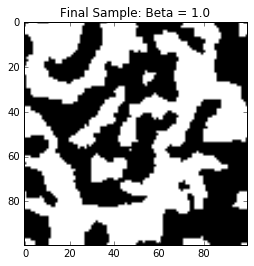

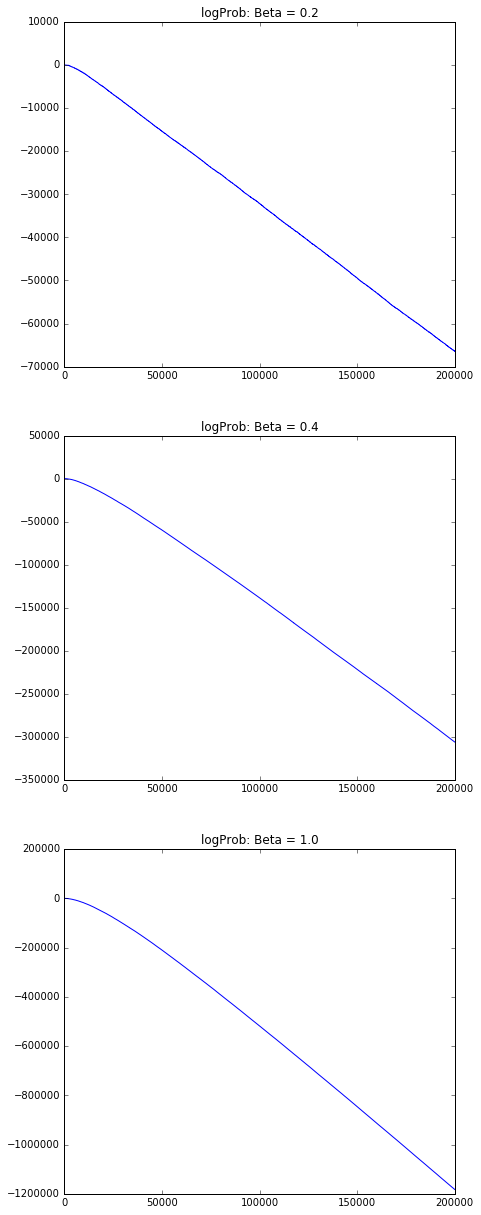

In [51]:
results = []

for b in [.2,.4,1.]:
    results.append([b,ising_metropolis(b, n=100, n_samples=50*100, burn_in=(200000 - 50*100))])
    plt.imshow(results[-1][1][0][-1], cmap='gray')
    plt.title("Final Sample: Beta = {}".format(b))
    plt.show()
fig = plt.figure(figsize=(7,21))
i = 1
for result in results:
    plt.subplot(3,1,i)
    plt.plot(np.arange(len(result[1][1])),result[1][1])
    plt.title("logProb: Beta = {}".format(result[0]))
    i += 1

I just honestly can't figure out what's wrong with my graphs, but the final samples look good and I've gone through all my code multiple times and have had other people check it for me.